In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import collections 
import re

import warnings 
warnings.filterwarnings("ignore")

mpl.rcParams['agg.path.chunksize'] = 10000

In [25]:
#Reading Data
df_purchase = pd.read_csv(r"/Users/jiyadariyani/Documents/Projects/Python Projects/Quantium Data Analytics Project/QVI_purchase_behaviour.csv")
df_transactions = pd.read_excel(r"/Users/jiyadariyani/Documents/Projects/Python Projects/Quantium Data Analytics Project/QVI_transaction_data.xlsx")

In [5]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [28]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Exploratory Data Analysis - EDA

In [7]:
# Checking the dimension of the dataset
df_purchase.shape

(72637, 3)

In [8]:
# checking Nulls
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<Axes: xlabel='LIFESTAGE'>

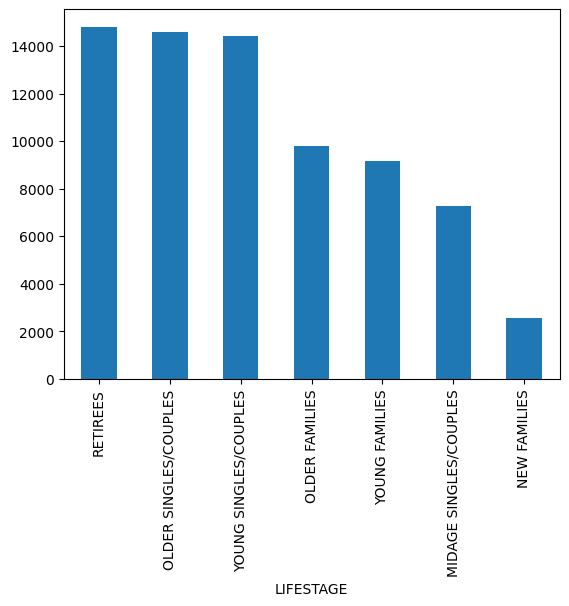

In [11]:
df_purchase['LIFESTAGE'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='PREMIUM_CUSTOMER'>

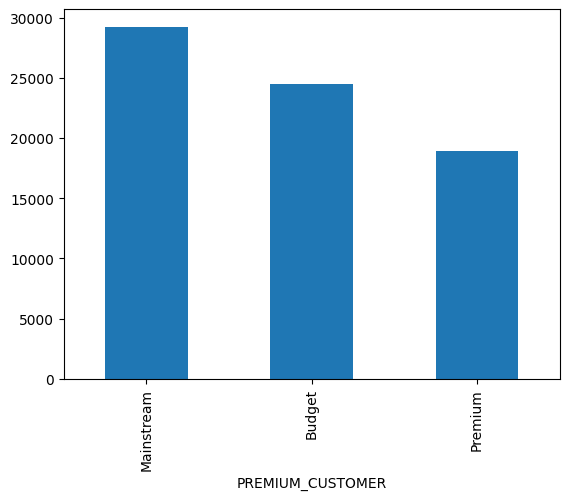

In [12]:
df_purchase['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

In [29]:
df_transactions.shape

(264836, 8)

In [30]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [31]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Changing Data Types

In [33]:
# Converting Date from int to date format

df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], unit = 'D', origin = '1899-12-30')
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [35]:
# Extracting the Brand_name from Product Name
df_transactions['BRAND_NAME'] = df_transactions['PROD_NAME'].str.extract('([A-Za-z]+)') 
df_transactions


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [36]:
# Extracting the Pack_Size from Product Name
df_transactions['PACK_SIZE'] = df_transactions['PROD_NAME'].str.extract('([0-9]+)') 
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150


In [43]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


<function matplotlib.pyplot.show(close=None, block=None)>

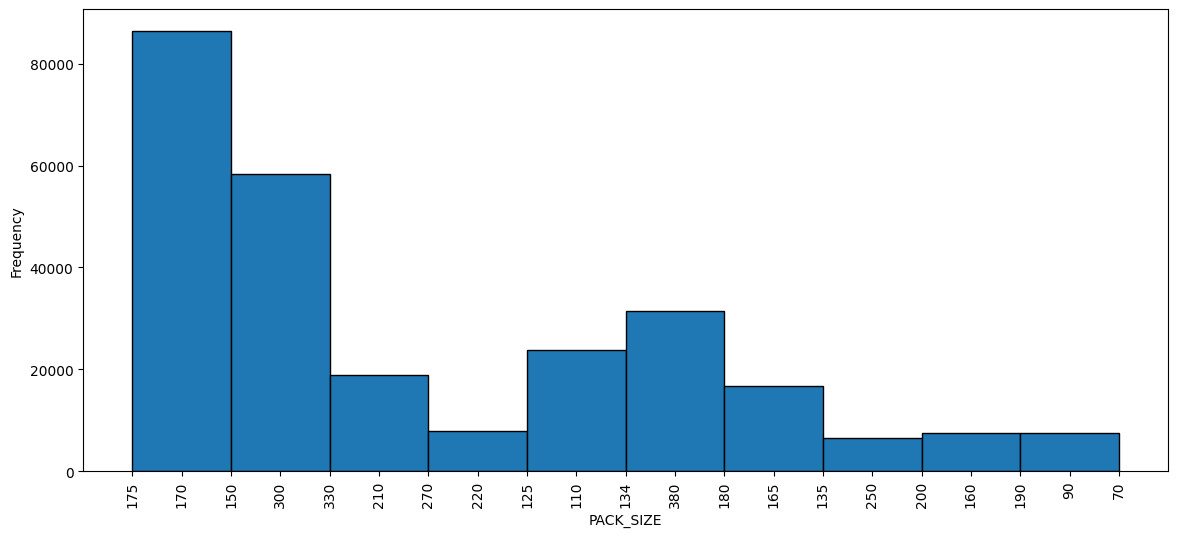

In [57]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist(df_transactions['PACK_SIZE'], edgecolor='black')
plt.xticks(df_transactions['PACK_SIZE'].unique(), rotation = 90)
ax.set_xlabel('PACK_SIZE')
ax.set_ylabel('Frequency')
plt.show

In [61]:
# Changing brand name Burger to Smiths, since Burger rings are Smiths Brand Chips
df_transactions['BRAND_NAME'] [(df_transactions['BRAND_NAME']== 'Burger')] = 'Smiths'
df_transactions['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'NCC', 'Cheezels', 'Infzns', 'Red',
       'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Snbts', 'Sunbites'], dtype=object)

In [69]:
df_transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [72]:
df_SalesbyDate = df_transactions[['DATE','TOT_SALES']].groupby(['DATE']).sum().reset_index()
Date = pd.DataFrame(pd.date_range(start='2018-07-01', end='2019-06-30')).rename({0:'DATE'}, axis = 1)
df_SalesbyDate = Date.merge(df_SalesbyDate, how='left',on='DATE') 

In [74]:
df_SalesbyDate

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


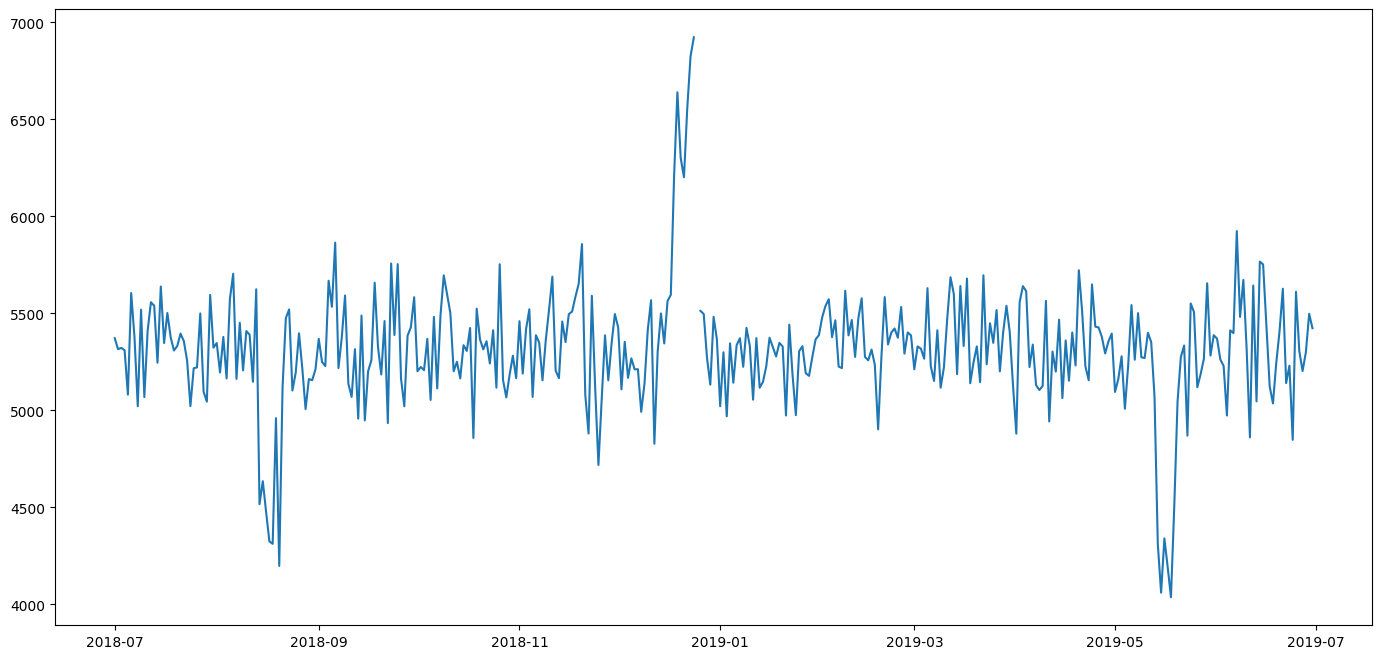

In [73]:
plt.figure(figsize=(17,8))
plt.plot(df_SalesbyDate['DATE'], df_SalesbyDate['TOT_SALES'])
plt.show()

In [76]:
# There is some missing Data in the month of December, let's zoom into 
# December = df_SalesbyDate[(df_SalesbyDate['DATE'] >= '2018-12-01') & (df_SalesbyDate['DATE'] <= '2018-12-31')]
dec = df_SalesbyDate[(df_SalesbyDate['DATE']>= '2018-12-01') & (df_SalesbyDate['DATE'] <= '2018-12-31')]
dec

,DATE,TOT_SALES
153,2018-12-01,5427.6
154,2018-12-02,5108.2
155,2018-12-03,5353.3
156,2018-12-04,5167.3
157,2018-12-05,5268.0
158,2018-12-06,5211.4
159,2018-12-07,5212.1
160,2018-12-08,4992.5
161,2018-12-09,5137.2
162,2018-12-10,5416.1


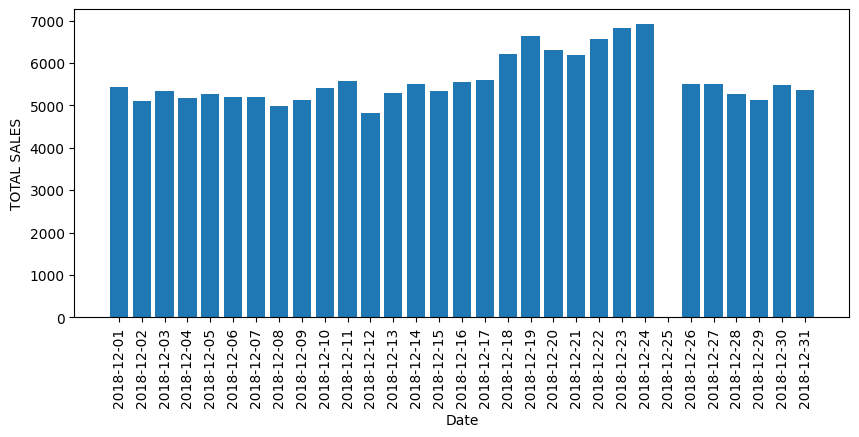

In [86]:
# Ploting a bar chart tot_sales by Date

fix, ax = plt.subplots(figsize = (10,4), dpi = 100)
ax.bar(dec['DATE'], dec['TOT_SALES'])
plt.xticks(dec['DATE'], rotation = 90)
ax.set_ylabel('TOTAL SALES')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# There is increase in sales near Christmas time but no sales on Christmas day, might have been a holiday.

In [89]:
# Merging the Data frames Transactions and Purchase
df = df_transactions.merge(right = df_purchase, how = 'inner', on='LYLTY_CARD_NBR' )
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [90]:
# Converting the Clean dataframe to csv file for Analysis
df.to_csv('Clean_QV_Data.csv', index=False)